In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

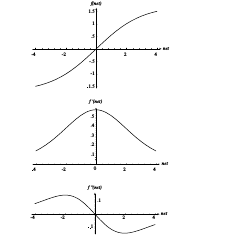

Fig.16: A useful transfer function f (net) is an anti-symmetric sigmoid. For the parameters given in the text, f (net) is nearly linear in the range −1 < net < +1 and its second derivative, f  (net), has extrema near net  ±2.

## Statistical Techniques and Neural Networks

### Related Statistical Techniques

### Projection Pursuit Regression
Projection pursuit regression implements the following equation:

$$
z = \sum_{j=1}^{j_{\text{max}}} w_j f_j(\mathbf{v}_j^\top \mathbf{x} + u_{j0}) + w_0
$$

- **Input Projection**: The terms $\mathbf{v}_j$ and $u_{j0}$ define projections of the input $\mathbf{x}$ onto $j_{\text{max}}$ hyperplanes.
- **Nonlinear Transformations**: The nonlinear functions $f_j(\cdot)$ transform these projections. Common choices include sigmoidal or Gaussian functions, producing ridge-like patterns in two dimensions.
- **Output**: Results are combined linearly to produce a scalar output, $z$. For classification tasks, $c$ such outputs exist, one for each category.
- **Training**: Parameters are iteratively updated to minimize an LMS error criterion, starting with $\mathbf{v}_1$ and $u_{10}$ and proceeding through $j_{\text{max}}$.

While projection pursuit has similarities with three-layer neural networks, it allows for more flexible $f_j(\cdot)$ functions, which may not saturate and can output values greater than $1.0$, making it suitable for regression tasks.

---

### Generalized Additive Models
Generalized additive models implement the equation:

$$
z = \sum_{i=1}^d f_i(x_i) + w_0
$$

- **Feature Functions**: Nonlinear functions $f_i(x_i)$, often sigmoidal, operate on individual input features.
- **Training**: Parameters of the nonlinearities $f_i(\cdot)$ are adjusted iteratively.
- **Special Case**: Basic three-layer neural networks are a special case of generalized additive models, differing primarily in training methods.

---

### Multivariate Adaptive Regression Splines (MARS)
MARS uses localized spline functions and implements:

$$
z = \sum_{k=1}^M \prod_{r=1}^{r_k} w_k \phi_{kr}(x_{q(k, r)}) + w_0
$$

- **Spline Functions**: Localized spline functions $\phi_{kr}$ are applied along input dimensions.
- **Incremental Fitting**: Splines are incrementally added by fitting data along each dimension.
- **Training**: Weights $w_k$ are optimized using LMS criteria.
- **Flexibility**: Allows highly flexible models with many adjustable parameters.

While MARS, projection pursuit, and similar methods were popular, they are largely supplanted by neural networks due to simpler training, scalability, and ease of incorporating additional training data.

---

## Practical Techniques for Backpropagation

### Transfer Functions
Desirable properties for a transfer function $f(\cdot)$ in backpropagation include:

1. **Nonlinearity**: Ensures the three-layer network exceeds the computational power of a two-layer network.
2. **Saturation**: Keeps weights and activations bounded, which limits training time.
3. **Continuity and Smoothness**: Both $f(\cdot)$ and $f'(\cdot)$ must be defined over the input range.
4. **Monotonicity**: Simplifies the error surface and reduces local extrema, though non-monotonic functions can be used with care.
5. **Linear Behavior for Small Inputs**: Ensures compatibility with linear models.
6. **Computational Simplicity**: Facilitates efficient computation of values and derivatives.

---

### Sigmoid Function
The sigmoid function is widely used due to its favorable properties:

$$
f(\text{net}) = a \cdot \tanh(b \cdot \text{net})
$$

- **Centered and Anti-Symmetric**: This form, where $f(-\text{net}) = -f(\text{net})$, accelerates learning by eliminating the need to learn data means.
- **Optimal Parameters**: Using $a = 1.716$ and $b = \frac{2}{3}$ ensures:
  - $f'(0) \approx 1$
  - Linear range: $-1 < \text{net} < +1$
  - Extrema of $f''(\text{net})$ occur near $\text{net} \approx \pm 2$

The sigmoid also maximizes information transmission for normally distributed features.

---

### Distributed Representation
Sigmoidal hidden units provide distributed representations, where multiple units are active for any given input. This contrasts with local representations (e.g., nearest neighbor classifiers) and is often superior with limited training data.

---

### Parameters for the Sigmoid
For practical purposes, $f(\text{net})$ is chosen as:

$$
f(\text{net}) = \frac{1 - e^{-b \cdot \text{net}}}{1 + e^{-b \cdot \text{net}}}
$$

- Simplifies computation.
- Maintains balance between training speed and accuracy.

---


In [1]:
import math
import random

# Sigmoid Function
class Sigmoid:
    @staticmethod
    def function(net):
        a, b = 1.716, 2/3
        return a * math.tanh(b * net)

    @staticmethod
    def derivative(net):
        a, b = 1.716, 2/3
        tanh_bn = math.tanh(b * net)
        return a * b * (1 - tanh_bn ** 2)

# Generalized Additive Model
class GeneralizedAdditiveModel:
    def __init__(self, input_size):
        self.functions = [Sigmoid for _ in range(input_size)]
        self.weights = [random.uniform(-0.1, 0.1) for _ in range(input_size)]
        self.bias = random.uniform(-0.1, 0.1)

    def forward(self, inputs):
        return sum(self.weights[i] * self.functions[i].function(inputs[i]) for i in range(len(inputs))) + self.bias

    def train(self, data, targets, learning_rate, epochs):
        for _ in range(epochs):
            for x, y in zip(data, targets):
                # Forward pass
                output = self.forward(x)
                error = output - y

                # Backpropagation and weight update
                for i in range(len(self.weights)):
                    grad = error * self.functions[i].derivative(x[i])
                    self.weights[i] -= learning_rate * grad
                self.bias -= learning_rate * error

# Simple Neural Network
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = [[random.uniform(-0.1, 0.1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.b1 = [random.uniform(-0.1, 0.1) for _ in range(hidden_size)]
        self.W2 = [[random.uniform(-0.1, 0.1) for _ in range(output_size)] for _ in range(hidden_size)]
        self.b2 = [random.uniform(-0.1, 0.1) for _ in range(output_size)]

    def forward(self, x):
        # Hidden layer
        self.hidden = [Sigmoid.function(sum(x[i] * self.W1[i][j] for i in range(self.input_size)) + self.b1[j]) for j in range(self.hidden_size)]
        # Output layer
        self.output = [Sigmoid.function(sum(self.hidden[j] * self.W2[j][k] for j in range(self.hidden_size)) + self.b2[k]) for k in range(self.output_size)]
        return self.output

    def backward(self, x, y, learning_rate):
        # Output layer error
        output_error = [self.output[k] - y[k] for k in range(self.output_size)]
        dW2 = [[output_error[k] * Sigmoid.derivative(self.output[k]) * self.hidden[j] for k in range(self.output_size)] for j in range(self.hidden_size)]
        db2 = [output_error[k] * Sigmoid.derivative(self.output[k]) for k in range(self.output_size)]

        # Hidden layer error
        hidden_error = [
            sum(output_error[k] * Sigmoid.derivative(self.output[k]) * self.W2[j][k] for k in range(self.output_size))
            for j in range(self.hidden_size)
        ]
        dW1 = [[hidden_error[j] * Sigmoid.derivative(self.hidden[j]) * x[i] for j in range(self.hidden_size)] for i in range(self.input_size)]
        db1 = [hidden_error[j] * Sigmoid.derivative(self.hidden[j]) for j in range(self.hidden_size)]

        # Update weights and biases
        self.W2 = [[self.W2[j][k] - learning_rate * dW2[j][k] for k in range(self.output_size)] for j in range(self.hidden_size)]
        self.b2 = [self.b2[k] - learning_rate * db2[k] for k in range(self.output_size)]
        self.W1 = [[self.W1[i][j] - learning_rate * dW1[i][j] for j in range(self.hidden_size)] for i in range(self.input_size)]
        self.b1 = [self.b1[j] - learning_rate * db1[j] for j in range(self.hidden_size)]

    def train(self, data, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in zip(data, targets):
                self.forward(x)
                self.backward(x, y, learning_rate)

# Example usage
if __name__ == "__main__":
    # Sample data
    X = [[0.1, 0.2], [0.4, 0.6], [0.5, 0.9], [0.9, 0.3]]
    y = [[0.3], [0.7], [1.0], [0.6]]

    # Neural Network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=3, output_size=1)
    nn.train(data=X, targets=y, epochs=1000, learning_rate=0.01)

    print("Neural Network Predictions:")
    for x in X:
        print(nn.forward(x))

    # Generalized Additive Model
    gam = GeneralizedAdditiveModel(input_size=2)
    gam.train(data=X, targets=[t[0] for t in y], learning_rate=0.01, epochs=1000)

    print("GAM Predictions:")
    for x in X:
        print(gam.forward(x))


Neural Network Predictions:
[0.34458072582855953]
[0.705283744490388]
[0.8985840557066147]
[0.6433619975103547]
GAM Predictions:
0.42115731546265156
0.509286065143375
0.45549276963158697
1.1851382205550471


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Preprocess data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize pixel values

# One-hot encode target labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Define sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Implementation
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Initialize and train the network
nn = SimpleNeuralNetwork(input_size=784, hidden_size=64, output_size=10)
loss_history = nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

# Predict on test data
y_pred = nn.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot a few test samples with predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred[i]}, True: {y_true[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import gzip
import struct
import random
import math

# Load the MNIST dataset
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        return [[pixel / 255.0 for pixel in f.read(rows * cols)] for _ in range(num)]

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        return [label for label in f.read(num)]

# Initialize weights and biases
def initialize_weights(input_size, hidden_size, output_size):
    W1 = [[random.uniform(-0.1, 0.1) for _ in range(hidden_size)] for _ in range(input_size)]
    b1 = [0.0] * hidden_size
    W2 = [[random.uniform(-0.1, 0.1) for _ in range(output_size)] for _ in range(hidden_size)]
    b2 = [0.0] * output_size
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward(X, W1, b1, W2, b2):
    hidden_input = [sum(X[i] * W1[i][j] for i in range(len(X))) + b1[j] for j in range(len(b1))]
    hidden_output = [sigmoid(x) for x in hidden_input]
    output_input = [sum(hidden_output[j] * W2[j][k] for j in range(len(hidden_output))) + b2[k] for k in range(len(b2))]
    output_output = [sigmoid(x) for x in output_input]
    return hidden_output, output_output

# Backward pass
def backward(X, y, hidden_output, output_output, W1, b1, W2, b2, learning_rate):
    output_errors = [(y[k] - output_output[k]) * sigmoid_derivative(output_output[k]) for k in range(len(y))]
    hidden_errors = [
        sum(output_errors[k] * W2[j][k] for k in range(len(output_errors))) * sigmoid_derivative(hidden_output[j])
        for j in range(len(hidden_output))
    ]

    for j in range(len(W2)):
        for k in range(len(W2[j])):
            W2[j][k] += learning_rate * output_errors[k] * hidden_output[j]
    for k in range(len(b2)):
        b2[k] += learning_rate * output_errors[k]

    for i in range(len(W1)):
        for j in range(len(W1[i])):
            W1[i][j] += learning_rate * hidden_errors[j] * X[i]
    for j in range(len(b1)):
        b1[j] += learning_rate * hidden_errors[j]

# Train the network
def train(X_train, y_train, W1, b1, W2, b2, epochs, learning_rate):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X_train)):
            X, y = X_train[i], y_train[i]
            hidden_output, output_output = forward(X, W1, b1, W2, b2)
            total_loss += sum((y[k] - output_output[k]) ** 2 for k in range(len(y)))
            backward(X, y, hidden_output, output_output, W1, b1, W2, b2, learning_rate)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(X_train):.4f}")

# Preprocess labels
def one_hot_encode(labels, num_classes):
    return [[1 if i == label else 0 for i in range(num_classes)] for label in labels]

# Load MNIST dataset
X_train = load_mnist_images('train-images-idx3-ubyte.gz')[:1000]  # Use a subset for simplicity
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')[:1000]
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')[:200]
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')[:200]

# One-hot encode labels
y_train = one_hot_encode(y_train, 10)

# Initialize network parameters
input_size = len(X_train[0])
hidden_size = 64
output_size = 10
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

# Train the network
train(X_train, y_train, W1, b1, W2, b2, epochs=10, learning_rate=0.1)

# Evaluate on test set
def evaluate(X_test, y_test, W1, b1, W2, b2):
    correct = 0
    for i in range(len(X_test)):
        _, output = forward(X_test[i], W1, b1, W2, b2)
        if output.index(max(output)) == y_test[i]:
            correct += 1
    print(f"Accuracy: {correct / len(X_test) * 100:.2f}%")

evaluate(X_test, y_test, W1, b1, W2, b2)


## Notes on Scaling Input, Target Values, Training with Noise, and Network Design

### Scaling Input
When working with inputs that have significantly different magnitudes (e.g., mass in grams vs. length in meters), it is essential to:

1. **Shift each feature** so that its mean over the training set is zero.
2. **Scale each feature** so that its variance is 1.0.

This ensures all features contribute equally to the error during training, avoiding arbitrary biases based on their units or scales.

#### Formula for Standardization:
For a feature $ x $:
$$
x' = \frac{x - \mu_x}{\sigma_x}
$$
Where:
- $ \mu_x $: Mean of feature $ x $
- $ \sigma_x $: Standard deviation of feature $ x $

### Target Values
In pattern recognition tasks:

- Use a **one-of-c** representation for the target vector.
- Saturating activations (e.g., $ \pm 1.716 $) should be avoided as target values. Instead, use:
  $$
t_i = \begin{cases}
    +1 & \text{if the pattern belongs to category } \omega_i \\
    -1 & \text{otherwise.}
  \end{cases}
  $$

For example, in a four-category problem, if the pattern belongs to category $ \omega_3 $:
$$
t = (-1, -1, +1, -1)
$$

### Training with Noise
When the training set is small, augment the dataset by adding Gaussian noise to the inputs. For standardized inputs:

- Noise variance: $ \sigma^2 < 1.0 $
- Example variance: $ \sigma^2 = 0.1 $

This creates surrogate patterns without changing the category labels.

#### Noise-Augmented Input:
$$
x' = x + \mathcal{N}(0, \sigma^2)
$$

### Manufacturing Data
If domain-specific knowledge is available (e.g., rotational invariance in image recognition), use it to generate more training examples:

- Rotate images by specific angles.
- Scale patterns or simulate bold characters for text.

This method extends the dataset with meaningful variations but can be memory-intensive.

### Number of Hidden Units
The number of hidden units $ n_H $:
- Governs the expressive power of the network.
- Too few units: High training and test error.
- Too many units: Overfitting and high test error.

#### Rule of Thumb:
- Total weights $ \approx \frac{n}{10} $

Where $ n $ is the total number of training samples.

### Initializing Weights
To ensure uniform learning:
- Initialize weights randomly from a uniform distribution:
  $$
  w_{ji} \in \left[-\frac{1}{\sqrt{d}}, \frac{1}{\sqrt{d}}\right]
  $$

Where:
- $ d $: Number of inputs to the hidden layer.

For hidden-to-output weights:
- $$
w_{kj} \in \left[-\frac{1}{\sqrt{n_H}}, \frac{1}{\sqrt{n_H}}\right]
$$
Where $ n_H $ is the number of hidden units.

### Learning Rates
Optimal learning rates depend on the criterion function $ J(w) $:

$$
\Delta w = - \eta \frac{\partial J}{\partial w}
$$

#### Optimal Learning Rate:
$$
\eta_{\text{opt}} = \frac{1}{\frac{\partial^2 J}{\partial w^2}}
$$

Large learning rates can lead to instability, while small rates slow down convergence.

### References
These guidelines are adapted from foundational neural network training principles.


![image-4.png](attachment:image-4.png)

Fig.17: The error per pattern for networks fully trained but diﬀering in the numbers of hidden units, nH . Each 2–nH –1 network (with bias) was trained with 90 two-dimensional patterns from each of two categories (sampled from a mixture of three Gaussians); thus n = 180. The minimum of the test error occurs for networks in the range 4 ≤ nH ≤ 5, i.e., the range of weights 17 to 21. This illustrates the rule of thumb that choosing networks with roughly n/10 weights often gives low test error.


![image-3.png](attachment:image-3.png)

Fig.18: Gradient descent in a one-dimensional quadratic criterion with diﬀerent learning rates. If η < ηopt , convergence is assured, but training can be needlessly slow. If η = ηopt , a single learning step suﬃces to ﬁnd the error minimum. If ηopt < η < 2ηopt , the system will oscillate but nevertheless converge, but training is needlessly slow. If η > 2ηopt , the system diverges.

![image-2.png](attachment:image-2.png)

Fig.19: If the criterion function is quadratic (above), its derivative is linear (be- low). The optimal learning rate ηopt insures that the weight value yielding minimum error, w∗ is found in a single learning step.


![image.png](attachment:image.png)

Fig.20: The incorporation of momentum into stochastic gradient descent by Eq. 36 (white arrows) reduces the variation in overall gradient directions and speeds learning, especially over plateaus in the error surface.

## Learning Rates and Momentum in Gradient Descent

### Gradient Descent Learning Rates

Gradient descent is sensitive to the choice of the learning rate $ \eta $. Different scenarios based on $ \eta $ include:

1. **$ \eta < \eta_{\text{opt}} $:**
   - Convergence is assured, but the process is slow.
2. **$ \eta = \eta_{\text{opt}} $:**
   - The error minimum is reached in a single learning step.
3. **$ \eta_{\text{opt}} < \eta < 2\eta_{\text{opt}} $:**
   - The system oscillates but still converges slowly.
4. **$ \eta > 2\eta_{\text{opt}} $:**
   - The system diverges.

#### Visualization of Learning Rate Effects

The behavior of gradient descent for different $ \eta $ values is shown in Fig.18. It illustrates convergence, oscillations, or divergence based on the learning rate.

$$
\eta_{\text{opt}} = -\frac{1}{\frac{\partial^2 J}{\partial w^2}}
$$

---

### Momentum in Gradient Descent

Momentum accelerates convergence by smoothing updates in regions of small gradient $ \frac{\partial J(w)}{\partial w} $, such as plateaus. The update rule with momentum is:

$$
w(m+1) = w(m) + \Delta w(m) + \alpha \Delta w(m-1)
$$

Where:
- $ \alpha $ is the momentum coefficient $( 0 < \alpha < 1 $).
- $ \Delta w(m) $ is the weight update at step $ m $.

#### Momentum Benefits
1. Reduces oscillations during stochastic updates.
2. Speeds up convergence over error plateaus.

Algorithm for stochastic gradient descent with momentum:
```python
# Pseudo-code for stochastic gradient descent with momentum
initialize topology, weights, learning rate (η), momentum (α), convergence threshold (θ)
repeat:
    select a random training pattern
    update weights with momentum:
        b_ji = ηδ_j x_i + αb_ji
        b_kj = ηδ_k y_j + αb_kj
        w_ji = w_ji + b_ji
        w_kj = w_kj + b_kj
until gradient < θ
return weights


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Dummy dataset for demonstration
x_train = torch.rand(100, 10)
y_train = (torch.sum(x_train, dim=1) > 5).float().view(-1, 1)  # Binary classification
data = TensorDataset(x_train, y_train)
dataloader = DataLoader(data, batch_size=16, shuffle=True)

# Define the network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.hidden = nn.Linear(10, 32)
        self.output = nn.Linear(32, 1)
        
        # Hint-based auxiliary output for vowels and consonants example
        self.hint_output = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        main_output = torch.sigmoid(self.output(x))
        hint_output = torch.softmax(self.hint_output(x), dim=1)
        return main_output, hint_output

# Initialize the model, loss, and optimizer
model = SimpleNet()
criterion_main = nn.BCELoss()
criterion_hint = nn.CrossEntropyLoss()  # For auxiliary classification task
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.01)  # Includes momentum and weight decay

# Training loop
epochs = 10
for epoch in range(epochs):
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        
        # Forward pass
        main_output, hint_output = model(x_batch)
        
        # Dummy hint labels (e.g., vowels/consonants, here randomly generated)
        hint_labels = (torch.rand(len(x_batch)) > 0.5).long()

        # Compute losses
        loss_main = criterion_main(main_output, y_batch)
        loss_hint = criterion_hint(hint_output, hint_labels)

        # Combine losses (weighted)
        loss = loss_main + 0.5 * loss_hint

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate model
def evaluate_model(model, x, y):
    model.eval()
    with torch.no_grad():
        main_output, _ = model(x)
        predictions = (main_output > 0.5).float()
        accuracy = (predictions == y).float().mean()
        print(f"Accuracy: {accuracy:.4f}")

# Evaluate on training data
evaluate_model(model, x_train, y_train)


Epoch 1/10, Loss: 1.1062
Epoch 2/10, Loss: 1.0056
Epoch 3/10, Loss: 1.0016
Epoch 4/10, Loss: 0.9345
Epoch 5/10, Loss: 0.9650
Epoch 6/10, Loss: 0.9502
Epoch 7/10, Loss: 0.8048
Epoch 8/10, Loss: 0.8942
Epoch 9/10, Loss: 0.9007
Epoch 10/10, Loss: 0.9138
Accuracy: 0.9300


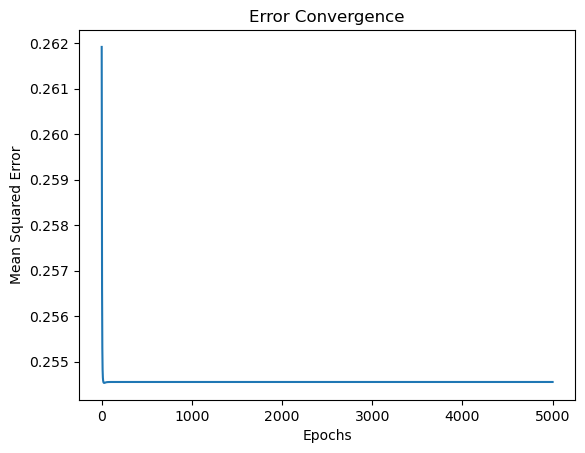

In [5]:
import random
import math
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

# Training function with momentum and weight decay
def train_network(data, n_hidden, n_epochs, learning_rate, momentum, weight_decay):
    random.seed(42)

    # Initialize weights and biases
    input_weights = [random.uniform(-1, 1) for _ in range(6)]  # 2 inputs + bias -> 3 per hidden unit
    hidden_weights = [random.uniform(-1, 1) for _ in range(n_hidden + 1)]  # n_hidden + bias

    prev_input_updates = [0] * len(input_weights)
    prev_hidden_updates = [0] * len(hidden_weights)

    errors = []

    for epoch in range(n_epochs):
        total_error = 0
        for inputs, target in data:
            # Forward pass
            hidden_inputs = [
                sum(inputs[i] * input_weights[j * 3 + i] for i in range(2)) + input_weights[j * 3 + 2]
                for j in range(n_hidden)
            ]
            hidden_outputs = [sigmoid(h) for h in hidden_inputs]

            final_input = sum(hidden_outputs[j] * hidden_weights[j] for j in range(n_hidden)) + hidden_weights[n_hidden]
            final_output = sigmoid(final_input)

            # Calculate error
            error = target - final_output
            total_error += error ** 2

            # Backward pass
            output_delta = error * sigmoid_derivative(final_output)

            hidden_deltas = [
                sigmoid_derivative(hidden_outputs[j]) * hidden_weights[j] * output_delta
                for j in range(n_hidden)
            ]

            # Update hidden-to-output weights
            hidden_updates = [
                learning_rate * output_delta * hidden_outputs[j] - weight_decay * hidden_weights[j]
                for j in range(n_hidden)
            ]
            hidden_updates.append(learning_rate * output_delta - weight_decay * hidden_weights[n_hidden])

            for j in range(len(hidden_weights)):
                hidden_weights[j] += hidden_updates[j] + momentum * prev_hidden_updates[j]

            prev_hidden_updates = hidden_updates

            # Update input-to-hidden weights
            for j in range(n_hidden):
                input_updates = [
                    learning_rate * hidden_deltas[j] * inputs[i] - weight_decay * input_weights[j * 3 + i]
                    for i in range(2)
                ]
                input_updates.append(learning_rate * hidden_deltas[j] - weight_decay * input_weights[j * 3 + 2])

                for i in range(3):
                    input_weights[j * 3 + i] += input_updates[i] + momentum * prev_input_updates[j * 3 + i]

                prev_input_updates[j * 3:j * 3 + 3] = input_updates

        errors.append(total_error / len(data))

    return errors

# Example usage
if __name__ == "__main__":
    # Define dataset: [inputs], target
    training_data = [
        ([0, 0], 0),
        ([0, 1], 1),
        ([1, 0], 1),
        ([1, 1], 0),
    ]

    n_hidden_units = 2
    n_epochs = 5000
    learning_rate = 0.1
    momentum = 0.9
    weight_decay = 0.01

    errors = train_network(training_data, n_hidden_units, n_epochs, learning_rate, momentum, weight_decay)

    # Plot error convergence
    plt.plot(errors)
    plt.title("Error Convergence")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()




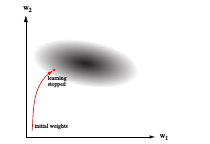

Fig.22: When weights are initialized with small magnitudes, stopped training is equivalent to a form of weight decay since the ﬁnal weights are smaller than they would be after extensive training.

## Neural Network Training Techniques

### Learning with Hints

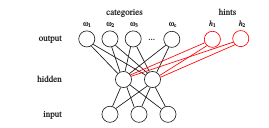

Fig.21: In learning with hints, the output layer of a standard network having c units (discriminant functions) is augmented with hint units. During training, the target vectors are also augmented with signals for the hint units. In this way the input-to-hidden weights learn improved feature groupings. During classiﬁcation the hint units are not used, and thus they and their hidden-to-output weights are removed from the trained network.

In learning with hints, the output layer of a standard network having \( c \) units (discriminant functions) is augmented with hint units. During training, the target vectors are also augmented with signals for the hint units. In this way, the input-to-hidden weights learn improved feature groupings.

During classification, the hint units are not used, and thus they and their hidden-to-output weights are removed from the trained network. The benefit provided by hints is in improved feature selection. So long as the hints are related to the classification problem at hand, the feature groupings useful for the hint task are likely to aid category learning.

For instance, the feature groupings useful for distinguishing vowel sounds from consonants in general are likely to be useful for distinguishing the /b/ from /oo/ or the /g/ from /ii/ categories in particular.

Alternatively, one can train just the hint units in order to develop improved hidden unit representations.

### Benefits of Hints
Learning with hints illustrates another benefit of neural networks: hints are more easily incorporated into neural networks than into classifiers based on other algorithms, such as nearest-neighbor or MARS.

---

## Training Protocols: Online, Stochastic, and Batch
### Comparison
1. **Online Learning**: Used when the amount of training data is so large that storing the data is prohibitive.  
2. **Stochastic Learning**: Preferred for large redundant training sets.  
3. **Batch Learning**: Admits second-order techniques but is slower due to redundant updates.

For practical applications, stochastic training is often preferred for its efficiency and effectiveness on redundant datasets.

---

## Stopped Training
Excessive training in neural networks can lead to **overfitting**, where the network models specific training data rather than generalizing. Stopping training early helps avoid this.

- **Stopped Training Criterion**: Stop when the error on a validation set reaches a minimum.
- **Relation to Weight Decay**: Stopped training can mimic weight decay by keeping weights small (see Figure 6.22).

---

## Hidden Layers
### How Many Layers?
Three layers suffice to implement any arbitrary function, and additional layers may not be necessary unless:
1. Addressing specific problems like translation or distortion invariances.
2. Dealing with tasks where the complexity can be distributed over multiple layers.

---

## Criterion Functions
### Squared Error Criterion
The most common training criterion:
$$
J(w) = \frac{1}{2} \sum_m \sum_k \left(z_{mk} - t_{mk}\right)^2
$$

### Cross Entropy
An alternative criterion:
$$
J(w)_{ce} = \sum_{m=1}^n \sum_{k=1}^c t_{mk} \ln\left(\frac{t_{mk}}{z_{mk}}\right)
$$

This requires outputs and targets in the range \( (0, 1) \).

### Minkowski Error
A general error metric:
$$
J_{Mink}(w) = \sum_{m=1}^n \sum_{k=1}^c \left| z_{mk}(x) - t_{mk}(x) \right|^R
$$

Where:
- $ R = 2 $ gives the standard squared error.
- $ R < 2 $ reduces the influence of long tails in the distributions.

---

## Combining Heuristics
Most heuristics for improving neural networks can be used in combination, though they may interact in unexpected ways. Proper experimentation and validation are required to determine the best setup for a given problem.



In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def main():
    # --- 1. Learning with Hints ---
    # Create a synthetic dataset with sufficient informative features
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add hint units (extra random features) to the training and validation data
    X_train_with_hints = np.concatenate([X_train, np.random.randn(X_train.shape[0], 5)], axis=1)  # Adding hint units
    X_val_with_hints = np.concatenate([X_val, np.random.randn(X_val.shape[0], 5)], axis=1)

    # Train a neural network with hint units
    model_with_hints = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
    model_with_hints.fit(X_train_with_hints, y_train)

    # Evaluate the model
    accuracy_with_hints = model_with_hints.score(X_val_with_hints, y_val)
    print(f'Accuracy with hints: {accuracy_with_hints:.4f}')

    # --- 2. Online, Stochastic, and Batch Learning ---
    # Online Learning (Stochastic Gradient Descent)
    sgd_online = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
    sgd_online.fit(X_train, y_train)

    # Evaluate the model
    accuracy_online = sgd_online.score(X_val, y_val)
    print(f'Accuracy with Online Learning: {accuracy_online:.4f}')

    # Batch Learning using MLPClassifier
    model_batch = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, solver='adam', random_state=42)
    model_batch.fit(X_train, y_train)

    # Evaluate the model
    accuracy_batch = model_batch.score(X_val, y_val)
    print(f'Accuracy with Batch Learning: {accuracy_batch:.4f}')

    # --- 3. Stopped Training ---
    # Model with early stopping (stopping when validation score stops improving)
    model_stopped = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, solver='adam', early_stopping=True,
                                  validation_fraction=0.1, random_state=42)
    model_stopped.fit(X_train, y_train)

    # Evaluate the model
    accuracy_stopped = model_stopped.score(X_val, y_val)
    print(f'Accuracy with Early Stopped Training: {accuracy_stopped:.4f}')

    # --- 4. Criterion Functions ---
    # Cross Entropy (Log Loss) with SGDClassifier
    sgd_cross_entropy = SGDClassifier(loss='log', max_iter=1000, random_state=42)
    sgd_cross_entropy.fit(X_train, y_train)

    # Evaluate the model
    accuracy_cross_entropy = sgd_cross_entropy.score(X_val, y_val)
    print(f'Accuracy with Cross-Entropy Loss: {accuracy_cross_entropy:.4f}')

    # Squared Error (used in regression)
    # We'll use a regressor for squared error, like MLPRegressor
    X_reg, y_reg = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
    X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
    mlp_regressor.fit(X_train_reg, y_train_reg)

    # Evaluate Squared Error
    mse = np.mean((mlp_regressor.predict(X_val_reg) - y_val_reg) ** 2)
    print(f'Mean Squared Error: {mse:.4f}')

    # --- 5. Combining Heuristics ---
    # Combine early stopping with L2 regularization (weight decay)
    model_regularized = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, solver='adam', alpha=0.01,
                                      early_stopping=True, validation_fraction=0.1, random_state=42)
    model_regularized.fit(X_train, y_train)

    # Evaluate the model
    accuracy_regularized = model_regularized.score(X_val, y_val)
    print(f'Accuracy with Regularization and Early Stopping: {accuracy_regularized:.4f}')


if __name__ == "__main__":
    main()


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy with hints: 0.7600
Accuracy with Online Learning: 0.5300


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy with Batch Learning: 0.7150
Accuracy with Early Stopped Training: 0.3100
Accuracy with Cross-Entropy Loss: 0.5300
Mean Squared Error: 0.1107
Accuracy with Regularization and Early Stopping: 0.3100


Early stopping at epoch 9053


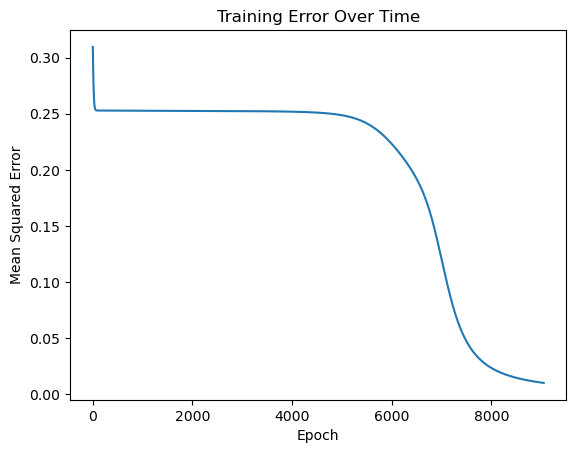

Input: [0, 0], Prediction: [0.10236002992861806]
Input: [0, 1], Prediction: [0.8938184173204334]
Input: [1, 0], Prediction: [0.8990137892745392]
Input: [1, 1], Prediction: [0.08912718035958221]


In [8]:
import random
import math
import matplotlib.pyplot as plt


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with random values
        self.weights_input_hidden = [[random.random() for _ in range(input_size)] for _ in range(hidden_size)]
        self.bias_hidden = [random.random() for _ in range(hidden_size)]
        
        self.weights_hidden_output = [[random.random() for _ in range(hidden_size)] for _ in range(output_size)]
        self.bias_output = [random.random() for _ in range(output_size)]
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_layer_input = [sum(inputs[j] * self.weights_input_hidden[i][j] for j in range(self.input_size)) + self.bias_hidden[i] for i in range(self.hidden_size)]
        self.hidden_layer_output = [self.sigmoid(x) for x in self.hidden_layer_input]
        
        self.output_layer_input = [sum(self.hidden_layer_output[i] * self.weights_hidden_output[j][i] for i in range(self.hidden_size)) + self.bias_output[j] for j in range(self.output_size)]
        self.output_layer_output = [self.sigmoid(x) for x in self.output_layer_input]
        
        return self.output_layer_output

    def backward(self, inputs, targets, learning_rate=0.1):
        # Calculate output layer error and gradients
        output_errors = [targets[i] - self.output_layer_output[i] for i in range(self.output_size)]
        output_gradients = [output_errors[i] * self.sigmoid_derivative(self.output_layer_output[i]) for i in range(self.output_size)]
        
        # Calculate hidden layer errors and gradients
        hidden_errors = [sum(output_gradients[j] * self.weights_hidden_output[j][i] for j in range(self.output_size)) for i in range(self.hidden_size)]
        hidden_gradients = [hidden_errors[i] * self.sigmoid_derivative(self.hidden_layer_output[i]) for i in range(self.hidden_size)]
        
        # Update weights and biases
        for i in range(self.hidden_size):
            for j in range(self.input_size):
                self.weights_input_hidden[i][j] += learning_rate * hidden_gradients[i] * inputs[j]
            self.bias_hidden[i] += learning_rate * hidden_gradients[i]
        
        for i in range(self.output_size):
            for j in range(self.hidden_size):
                self.weights_hidden_output[i][j] += learning_rate * output_gradients[i] * self.hidden_layer_output[j]
            self.bias_output[i] += learning_rate * output_gradients[i]

    def train(self, inputs, targets, epochs=1000, learning_rate=0.1, early_stop_threshold=0.01):
        # Train the neural network
        errors = []
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(inputs)):
                output = self.forward(inputs[i])
                self.backward(inputs[i], targets[i], learning_rate)
                total_error += sum((targets[i][j] - output[j]) ** 2 for j in range(self.output_size))  # Mean squared error
            
            errors.append(total_error / len(inputs))
            if total_error / len(inputs) < early_stop_threshold:
                print(f"Early stopping at epoch {epoch + 1}")
                break
        return errors

    def predict(self, inputs):
        return self.forward(inputs)


def plot_errors(errors):
    plt.plot(errors)
    plt.title("Training Error Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.show()


# Example to use the neural network:
if __name__ == "__main__":
    # Define a simple XOR problem for illustration
    inputs = [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
    
    targets = [
        [0],  # XOR output for [0, 0]
        [1],  # XOR output for [0, 1]
        [1],  # XOR output for [1, 0]
        [0]   # XOR output for [1, 1]
    ]

    # Create neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

    # Train the neural network
    errors = nn.train(inputs, targets, epochs=10000, learning_rate=0.1, early_stop_threshold=0.01)

    # Plot the training error
    plot_errors(errors)

    # Test the trained network
    for i in range(len(inputs)):
        print(f"Input: {inputs[i]}, Prediction: {nn.predict(inputs[i])}")






## Important Pattern Recognition Problems

###  Second-Order Methods

We have used a second-order analysis of the error in order to determine the optimal learning rate. One can use second-order information more fully in other ways.

###  Hessian Matrix

We derived the first-order derivatives of a sum-squared-error criterion function in three-layer networks, summarized in Eqs. 16 & 20. We now turn to second-order derivatives, which find use in rapid learning methods, as well as some pruning or regularization algorithms. For our criterion function:

$$
J(w) = \frac{1}{2} \sum_{m=1}^{n} (t_m - z_m)^2
$$

where \( t_m \) and \( z_m \) are the target and output signals, and \( n \) is the total number of training patterns.

The elements in the Hessian matrix are:

$$
\frac{\partial^2 J(w)}{\partial w_{ji} \partial w_{lk}} = \sum_{m=1}^{n} \frac{\partial J}{\partial w_{ji}} \frac{\partial J}{\partial w_{lk}}
$$

where we have used the subscripts to refer to any weight in the network — thus $ i, j, l, k $ could all take on values that describe input-to-hidden weights, hidden-to-output weights, or mixtures. Of course, the Hessian matrix is symmetric.

The second term is often neglected, as it is of order $ O(|t - o|) $; using Fisher’s method of scoring, we set this term to zero. This gives the expected value, a positive definite matrix, thereby guaranteeing that gradient descent will progress.

In this so-called Levenberg-Marquardt approximation, our Hessian reduces to:

- If the two weights are both in the hidden-to-output layer:

$$
H_{\text{outout}}
$$

- If the two weights are both in the input-to-hidden layer:

$$
H_{\text{inin}}
$$

- If the weights are in different layers:

$$
H_{\text{inout}}
$$

###  Newton’s Method

The update rule in Newton’s method is derived as follows:

$$
\Delta J(w) = J(w + \Delta w) - J(w) \approx \frac{\partial J(w)}{\partial w} \Delta w + \frac{1}{2} \Delta w^T H \Delta w
$$

where \( H \) is the Hessian matrix. Differentiating this with respect to \( \Delta w \) yields:

$$
\frac{\partial J(w)}{\partial w} + H \Delta w = 0
$$

Thus, the optimum change in weights is:

$$
\Delta w = -H^{-1} \frac{\partial J(w)}{\partial w}
$$

This iterative process gives an improved estimate for the weights:

$$
w^{(m+1)} = w^{(m)} - H^{-1} \frac{\partial J(w)}{\partial w}
$$

However, the computation of the Hessian can be expensive, and there is no guarantee that the Hessian is nonsingular.

###  Quickprop

Quickprop is a simple method to use second-order information to speed up training. In this method, the weights are assumed to be independent, and the descent is optimized separately for each. The error surface is assumed to be quadratic (i.e., a parabola), and the coefficients for the parabola are determined by two successive evaluations of $ J(w) $ and $ \frac{dJ(w)}{dw} $. The single weight $ w $ is then moved to the computed minimum of the parabola, as shown in the figure:

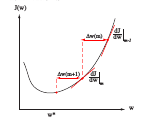

Fig.23: The quickprop weight update takes the error derivatives at two points separated by a known amount, and by Eq. 51 makes its next weight value. If the error can be fully expressed as a second-order function, then the weight update leads to the weight (w∗ ) leading to minimum error.

The weight update rule for Quickprop is:

$$
\Delta w^{(m+1)} = \frac{\frac{dJ}{dw}_{m}}{\frac{dJ}{dw}_{m-1}} \Delta w^{(m)}
$$

This approach can be faster than standard backpropagation under certain conditions. Each weight has its own learning rate, and weights tend to converge at the same time, reducing problems due to nonuniform learning.

###  Conjugate Gradient Descent

Conjugate gradient descent is another fast learning method, which employs a series of line searches in the weight or parameter space. The first descent direction is chosen (for instance, determined by the gradient), and one moves along that direction until the minimum in error is reached. The second descent direction is computed such that it remains "conjugate" to the first. This means that the gradient changes in magnitude but not in direction along the second descent path.

The figure below illustrates this process:

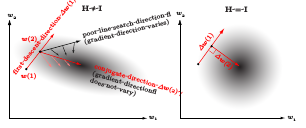

Fig.24: Conjugate gradient descent in weight space employs a sequence of line searches. If ∆w(1) is the ﬁrst descent direction, the second direction obeys ∆wt (1)H∆w(2) = 0. Note especially that along this second descent, the gradient changes only in magnitude, not direction; as such the second descent does not “spoil” the contribution due to the previous line search. In the case where the Hessian is diagonal (right), the directions of the line searches are orthogonal.

In this case, if $ \Delta w^{(1)} $ is the first descent direction, the second direction obeys:

$$
\Delta w^{(1)} H \Delta w^{(2)} = 0
$$

The directions of the line searches are orthogonal when the Hessian is diagonal.


In [9]:
import random

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input-to-hidden and hidden-to-output layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.weights_input_hidden = [[random.random() for _ in range(input_size)] for _ in range(hidden_size)]
        self.weights_hidden_output = [[random.random() for _ in range(hidden_size)] for _ in range(output_size)]
        
    def forward(self, X):
        # Perform forward propagation
        self.hidden_layer = [sum(X[i] * self.weights_input_hidden[j][i] for i in range(self.input_size)) for j in range(self.hidden_size)]
        self.output_layer = [sum(self.hidden_layer[j] * self.weights_hidden_output[k][j] for j in range(self.hidden_size)) for k in range(self.output_size)]
        return self.output_layer
    
    def compute_gradient(self, X, y):
        # Compute gradients for the input-to-hidden and hidden-to-output weights
        output_error = [self.output_layer[i] - y[i] for i in range(self.output_size)]
        hidden_error = [sum(output_error[k] * self.weights_hidden_output[k][j] for k in range(self.output_size)) for j in range(self.hidden_size)]
        
        grad_input_hidden = [[0] * self.input_size for _ in range(self.hidden_size)]
        grad_hidden_output = [[0] * self.hidden_size for _ in range(self.output_size)]
        
        for i in range(self.hidden_size):
            for j in range(self.input_size):
                grad_input_hidden[i][j] = 2 * self.hidden_layer[i] * X[j]  # Using squared error gradient
        
        for k in range(self.output_size):
            for j in range(self.hidden_size):
                grad_hidden_output[k][j] = 2 * output_error[k] * self.hidden_layer[j]  # Using squared error gradient
        
        return grad_input_hidden, grad_hidden_output
    
    def hessian(self, X, y):
        # Compute Hessian matrix elements (simplified version for diagonal Hessian)
        grad_input_hidden, grad_hidden_output = self.compute_gradient(X, y)
        hessian_input_hidden = [[grad_input_hidden[i][j] * grad_input_hidden[i][j] for j in range(self.input_size)] for i in range(self.hidden_size)]
        hessian_hidden_output = [[grad_hidden_output[k][j] * grad_hidden_output[k][j] for j in range(self.hidden_size)] for k in range(self.output_size)]
        
        return hessian_input_hidden, hessian_hidden_output
    
    def newtons_method(self, X, y, learning_rate=0.1):
        # Apply Newton's Method to update weights
        grad_input_hidden, grad_hidden_output = self.compute_gradient(X, y)
        hessian_input_hidden, hessian_hidden_output = self.hessian(X, y)
        
        # For simplicity, we assume diagonal Hessian (no off-diagonal elements)
        # Update weights using the formula: w = w - H^-1 * gradient
        for i in range(self.hidden_size):
            for j in range(self.input_size):
                if hessian_input_hidden[i][j] != 0:  # Avoid division by zero
                    self.weights_input_hidden[i][j] -= learning_rate * grad_input_hidden[i][j] / hessian_input_hidden[i][j]
        
        for k in range(self.output_size):
            for j in range(self.hidden_size):
                if hessian_hidden_output[k][j] != 0:
                    self.weights_hidden_output[k][j] -= learning_rate * grad_hidden_output[k][j] / hessian_hidden_output[k][j]
    
    def quickprop(self, X, y, prev_gradient_input_hidden, prev_gradient_hidden_output, learning_rate=0.1):
        # Apply Quickprop method to update weights
        grad_input_hidden, grad_hidden_output = self.compute_gradient(X, y)
        
        # Update weights using Quickprop formula
        for i in range(self.hidden_size):
            for j in range(self.input_size):
                delta_grad = grad_input_hidden[i][j] - prev_gradient_input_hidden[i][j]
                if delta_grad != 0:
                    self.weights_input_hidden[i][j] -= learning_rate * grad_input_hidden[i][j] * prev_gradient_input_hidden[i][j] / delta_grad
        
        for k in range(self.output_size):
            for j in range(self.hidden_size):
                delta_grad = grad_hidden_output[k][j] - prev_gradient_hidden_output[k][j]
                if delta_grad != 0:
                    self.weights_hidden_output[k][j] -= learning_rate * grad_hidden_output[k][j] * prev_gradient_hidden_output[k][j] / delta_grad
        
        return grad_input_hidden, grad_hidden_output


# Example usage:
def train_network():
    # Example neural network with 2 inputs, 3 hidden neurons, and 2 outputs
    nn = NeuralNetwork(input_size=2, hidden_size=3, output_size=2)
    
    # Sample training data (X) and targets (y)
    X = [0.5, 0.5]  # Example input
    y = [1, 0]      # Target output
    
    # Variables to store previous gradients for Quickprop
    prev_gradient_input_hidden = [[0] * 2 for _ in range(3)]
    prev_gradient_hidden_output = [[0] * 3 for _ in range(2)]
    
    # Training loop
    for epoch in range(100):
        nn.forward(X)  # Forward pass
        
        # Newton's method
        nn.newtons_method(X, y)
        
        # Quickprop
        prev_gradient_input_hidden, prev_gradient_hidden_output = nn.quickprop(X, y, prev_gradient_input_hidden, prev_gradient_hidden_output)
        
        print(f"Epoch {epoch + 1}: Weights updated")
    
    # After training, output the final weights
    print("Final weights (input to hidden):", nn.weights_input_hidden)
    print("Final weights (hidden to output):", nn.weights_hidden_output)


if __name__ == "__main__":
    train_network()


Epoch 1: Weights updated
Epoch 2: Weights updated
Epoch 3: Weights updated
Epoch 4: Weights updated
Epoch 5: Weights updated
Epoch 6: Weights updated
Epoch 7: Weights updated
Epoch 8: Weights updated
Epoch 9: Weights updated
Epoch 10: Weights updated
Epoch 11: Weights updated
Epoch 12: Weights updated
Epoch 13: Weights updated
Epoch 14: Weights updated
Epoch 15: Weights updated
Epoch 16: Weights updated
Epoch 17: Weights updated
Epoch 18: Weights updated
Epoch 19: Weights updated
Epoch 20: Weights updated
Epoch 21: Weights updated
Epoch 22: Weights updated
Epoch 23: Weights updated
Epoch 24: Weights updated
Epoch 25: Weights updated
Epoch 26: Weights updated
Epoch 27: Weights updated
Epoch 28: Weights updated
Epoch 29: Weights updated
Epoch 30: Weights updated
Epoch 31: Weights updated
Epoch 32: Weights updated
Epoch 33: Weights updated
Epoch 34: Weights updated
Epoch 35: Weights updated
Epoch 36: Weights updated
Epoch 37: Weights updated
Epoch 38: Weights updated
Epoch 39: Weights upd

### Conjugate Gradient Descent Algorithm

Conjugate gradient descent is a method for solving optimization problems, particularly useful for finding the minimum of a quadratic criterion function. The descent direction in each iteration is adjusted to avoid "spoiling" the direction of previous descent, ensuring a more efficient path to the minimum.

#### Descent Direction and Conjugacy Condition

At each step $ m $, the descent direction $ \Delta w(m) $ is constructed to be conjugate to the previous directions, satisfying the following condition:

$$
\Delta w^{(m-1)T} H \Delta w^{(m)} = 0
$$

where $ H $ is the Hessian matrix. If the Hessian is proportional to the identity matrix, these directions are orthogonal in weight space. This condition ensures that each new direction does not interfere with the progress made in previous iterations.

#### Conjugate Gradient Update

The descent direction for iteration $ m $ is a combination of the gradient and the previous descent direction:

$$
\Delta w^{(m)} = -\nabla J(w^{(m)}) + \beta_m \Delta w^{(m-1)}
$$

The parameter $ \beta_m $ determines the relative contributions of the gradient and previous descent direction. Two common formulas for calculating $ \beta_m $ are:

1. **Fletcher-Reeves Formula**:

$$
\beta_m = \frac{[\nabla J(w^{(m)})]^T \nabla J(w^{(m)})}{[\nabla J(w^{(m-1)})]^T \nabla J(w^{(m-1)})}
$$

2. **Polak-Ribiere Formula** (more robust for non-quadratic functions):

$$
\beta_m = \frac{[\nabla J(w^{(m)})]^T [\nabla J(w^{(m)}) - \nabla J(w^{(m-1)})]}{[\nabla J(w^{(m-1)})]^T \nabla J(w^{(m-1)})}
$$

#### Example: Conjugate Gradient Descent on a Quadratic Criterion Function

Consider the following simple quadratic criterion function centered on the origin of weight space:

$$
J(w) = \frac{1}{2} (0.2 w_1^2 + w_2^2) = w^T H w
$$

The Hessian matrix $ H $ is:

$$
H = \begin{pmatrix} 0.2 & 0 \\ 0 & 1 \end{pmatrix}
$$

We start at an initial point $ w^{(0)} = \begin{pmatrix} -8 \\ -4 \end{pmatrix} $. The gradient at $ w^{(0)} $ is:

$$
-\nabla J(w^{(0)}) = \begin{pmatrix} 3.2 \\ 8 \end{pmatrix}
$$

A line search along this direction gives the step size $ s = 0.562 $, so the updated position is:

$$
w^{(1)} = w^{(0)} + s (-\nabla J(w^{(0)})) = \begin{pmatrix} -6.202 \\ 0.496 \end{pmatrix}
$$

Next, the gradient at $ w^{(1)} $ is:

$$
-\nabla J(w^{(1)}) = \begin{pmatrix} 2.48 \\ -0.99 \end{pmatrix}
$$

Using the **Fletcher-Reeves formula**, we compute $ \beta_1 $:

$$
\beta_1 = \frac{[\nabla J(w^{(1)})]^T \nabla J(w^{(1)})}{[\nabla J(w^{(0)})]^T \nabla J(w^{(0)})} = \frac{(-2.48 \times 2.48 + 0.99 \times -0.99)}{(-3.2 \times -3.2 + 8 \times 8)} = 0.096
$$

Thus, the conjugate gradient direction at step $ m = 1 $ is:

$$
\Delta w^{(1)} = -\nabla J(w^{(1)}) + \beta_1 \Delta w^{(0)} = \begin{pmatrix} 2.788 \\ -0.223 \end{pmatrix}
$$

Performing a line search to find the minimum along this new direction, we obtain the step size $ s = 2.231 $, resulting in:

$$
w^{(2)} = w^{(1)} + s \Delta w^{(1)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$

Thus, the conjugate gradient method converges to the global minimum after two iterations, which is the dimension of the space (in this case, $ 2 $ dimensions).

#### Conclusion

In this example, the conjugate gradient descent method efficiently finds the global minimum of a quadratic error surface in just two iterations, demonstrating its effectiveness in optimizing quadratic functions with guaranteed convergence in $ n $ iterations for $ n $-dimensional problems.


Converged after 2 iterations.


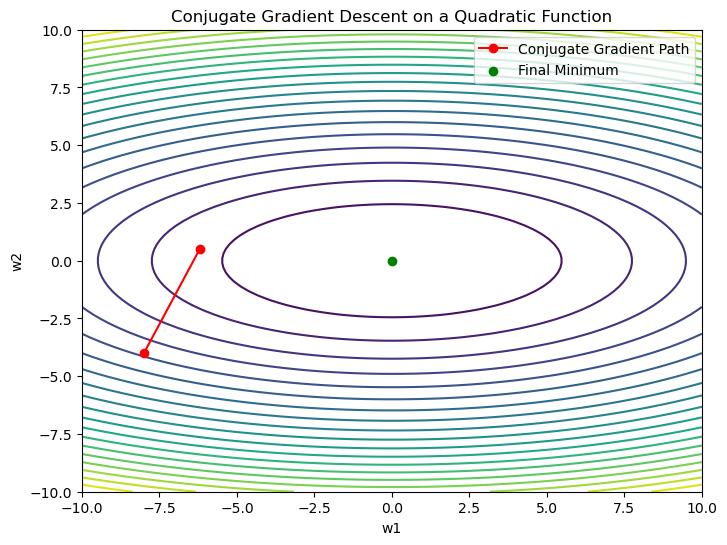

Final weights: [0.00000000e+00 3.33066907e-16]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def J(w):
    """
    Quadratic function J(w) = 1/2 * (0.2 * w1^2 + w2^2)
    """
    return 0.1 * w[0]**2 + 0.5 * w[1]**2

def grad_J(w):
    """
    Gradient of J(w)
    """
    grad = np.zeros_like(w)
    grad[0] = 0.2 * w[0]
    grad[1] = w[1]
    return grad

# Conjugate Gradient Descent implementation
def conjugate_gradient(w_init, max_iter=10, tol=1e-5):
    """
    Conjugate Gradient Descent method to minimize quadratic function J(w)
    
    w_init: initial weight vector
    max_iter: maximum number of iterations
    tol: tolerance for convergence
    """
    w = w_init
    grad = grad_J(w)
    r = -grad  # Initial residual
    p = r.copy()  # Initial search direction
    rs_old = np.dot(r, r)
    
    history = [w.copy()]  # To store the history of the weights
    
    for i in range(max_iter):
        Ap = np.dot(np.array([[0.2, 0], [0, 1]]), p)  # Hessian * p (for quadratic case)
        alpha = rs_old / np.dot(p, Ap)
        w = w + alpha * p  # Update weights
        grad = grad_J(w)  # Compute new gradient
        r = -grad  # New residual
        
        rs_new = np.dot(r, r)
        
        # Check for convergence
        if np.sqrt(rs_new) < tol:
            print(f"Converged after {i+1} iterations.")
            break
        
        beta = rs_new / rs_old
        p = r + beta * p  # Update direction
        
        rs_old = rs_new
        history.append(w.copy())
    
    return np.array(history), w

# Initial weight guess
w_init = np.array([-8.0, -4.0])

# Run Conjugate Gradient Descent
history, final_w = conjugate_gradient(w_init)

# Plotting the path of the conjugate gradient descent
history = history.T  # Transpose for easier plotting
plt.figure(figsize=(8, 6))
w1_range = np.linspace(-10, 10, 100)
w2_range = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
Z = 0.1 * W1**2 + 0.5 * W2**2

plt.contour(W1, W2, Z, levels=20)
plt.plot(history[0], history[1], 'r-o', label='Conjugate Gradient Path')
plt.scatter(final_w[0], final_w[1], color='green', label='Final Minimum')
plt.title('Conjugate Gradient Descent on a Quadratic Function')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.show()

print(f"Final weights: {final_w}")


Converged after 2 iterations.


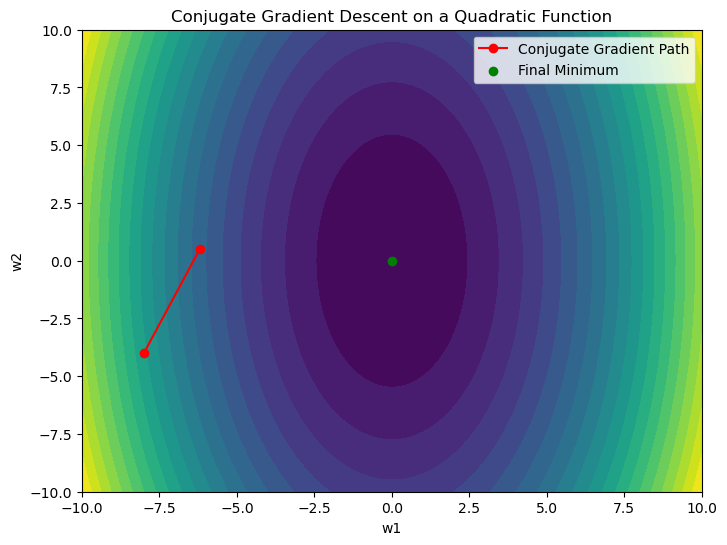

Final weights: [0.0, 3.3306690738754696e-16]


In [12]:
import matplotlib.pyplot as plt

# Define the quadratic function and its gradient
def J(w):
    """
    Quadratic function J(w) = 1/2 * (0.2 * w1^2 + w2^2)
    """
    return 0.1 * w[0]**2 + 0.5 * w[1]**2

def grad_J(w):
    """
    Gradient of J(w)
    """
    grad = [0.2 * w[0], w[1]]
    return grad

# Conjugate Gradient Descent implementation
def conjugate_gradient(w_init, max_iter=10, tol=1e-5):
    """
    Conjugate Gradient Descent method to minimize quadratic function J(w)
    
    w_init: initial weight vector [w1, w2]
    max_iter: maximum number of iterations
    tol: tolerance for convergence
    """
    w = w_init
    grad = grad_J(w)
    r = [-g for g in grad]  # Initial residual (-gradient)
    p = r[:]  # Initial search direction
    rs_old = sum(r[i] * r[i] for i in range(len(r)))
    
    history = [w[:]]  # To store the history of the weights
    
    for i in range(max_iter):
        # Hessian is constant in this quadratic case: H = [[0.2, 0], [0, 1]]
        Ap = [0.2 * p[0], p[1]]  # Hessian * p (Ap)
        
        # Calculate alpha (step size)
        alpha = rs_old / sum(p[i] * Ap[i] for i in range(len(p)))
        
        # Update weights
        w = [w[0] + alpha * p[0], w[1] + alpha * p[1]]
        
        # Compute new gradient
        grad = grad_J(w)
        
        # New residual
        r = [-g for g in grad]
        
        rs_new = sum(r[i] * r[i] for i in range(len(r)))
        
        # Check for convergence
        if rs_new < tol:
            print(f"Converged after {i+1} iterations.")
            break
        
        # Compute beta (for conjugate direction update)
        beta = rs_new / rs_old
        
        # Update search direction
        p = [r[i] + beta * p[i] for i in range(len(r))]
        
        rs_old = rs_new
        history.append(w[:])
    
    return history, w

# Initial weight guess
w_init = [-8.0, -4.0]

# Run Conjugate Gradient Descent
history, final_w = conjugate_gradient(w_init)

# Generate the grid for contour plot
w1_range = [i / 10 for i in range(-100, 101)]  # Range for w1
w2_range = [i / 10 for i in range(-100, 101)]  # Range for w2

# Create the Z values (error surface)
Z = []
for w1 in w1_range:
    row = []
    for w2 in w2_range:
        row.append(0.1 * w1**2 + 0.5 * w2**2)  # Calculate J(w1, w2)
    Z.append(row)

# Create contour plot of the error surface
history = list(zip(*history))  # Transpose for easier plotting
plt.figure(figsize=(8, 6))
plt.contourf(w1_range, w2_range, Z, levels=20)
plt.plot(history[0], history[1], 'r-o', label='Conjugate Gradient Path')
plt.scatter(final_w[0], final_w[1], color='green', label='Final Minimum')
plt.title('Conjugate Gradient Descent on a Quadratic Function')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.show()

print(f"Final weights: {final_w}")
